#Initialization

Import the required packages and modules

In [ ]:
import sklearn as sk
import pandas as pd
import numpy as np
import imblearn
from sklearn import metrics

Read the MAGIC dataset and assign x & y

In [ ]:
file_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
headers = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
magic = pd.read_csv(file_url, sep=",", names=headers)
display(magic)
x = magic.iloc[:,:-1]
y = magic.iloc[:,-1]

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


#Data Split

Split the dataset randomly so that the training set would form 70% of the dataset and the testing set would form 30% of it.

Then split the testing set into 2 sets :
- Validation set : to help tune model parameters and help control overfitting.
- Test set : to assess the performance of the final model and provide an estimation of the test error.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_allTest, y_train, y_allTest = train_test_split(x, y, test_size=.3, random_state=0)
x_validation, x_test, y_validation, y_test = train_test_split(x_allTest, y_allTest, test_size=.5, random_state=0)

#Data Balancing

Balance the dataset, randomly put aside the extra readings for the gamma “g” class to make both classes equal in size.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler()
x_res , y_res = under_sampler.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(magic.shape)
print(x.shape)
print(y.shape)
print(x_train.shape)
print(y_train.shape)
print(x_res.shape)
print(y_res.shape)
unique, counts = np.unique(y_res, return_counts=True)
print(dict(zip(unique, counts)))
print(x_allTest.shape)
print(y_allTest.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)

(19019, 11)
(19019, 10)
(19019,)
(13313, 10)
(13313,)
(9292, 10)
(9292,)
{'g': 4646, 'h': 4646}
(5706, 10)
(5706,)
(2853, 10)
(2853,)
(2853, 10)
(2853,)


#Applying the classifiers

####Decision Tree Classifier

In [ ]:
#Import Decision Tree model
from sklearn.tree import DecisionTreeClassifier
#Create classifier model
decision_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
#Train the model using the training sets
decision_tree_trained = decision_tree_model.fit(x_res, y_res)

Accuracy: 0.7949526813880127
classification report:
              precision    recall  f1-score   support

           g       0.88      0.80      0.84      1860
           h       0.68      0.79      0.73       993

    accuracy                           0.79      2853
   macro avg       0.78      0.79      0.78      2853
weighted avg       0.81      0.79      0.80      2853

Confusion matrix: [[1483  377]
 [ 208  785]]


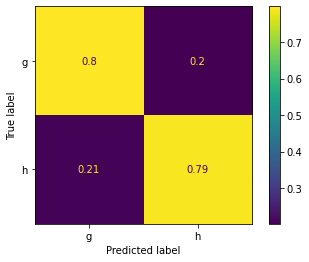

In [ ]:
# Testing the model

#Predict the response for test dataset
y_pred = decision_tree_trained.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("classification report:")
print(metrics.classification_report(y_test, y_pred))
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
confusion_matrix = metrics.plot_confusion_matrix(decision_tree_trained, x_test, y_test, normalize='true')

####Random Forest Classifier

In [ ]:
#Import Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
#Create classifier model
random_forest_model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': np.linspace(start = 200, stop = 2000, num = 10, dtype=int)}
# run grid search
RFC_grid_search = GridSearchCV(random_forest_model, param_grid=param_grid)
RFC_grid_search.fit(x_res, y_res)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

{'n_estimators': 200}
Accuracy: 0.866105853487557
classification report:
              precision    recall  f1-score   support

           g       0.91      0.88      0.90      1860
           h       0.79      0.84      0.81       993

    accuracy                           0.87      2853
   macro avg       0.85      0.86      0.85      2853
weighted avg       0.87      0.87      0.87      2853

Confusion matrix: [[1634  226]
 [ 156  837]]


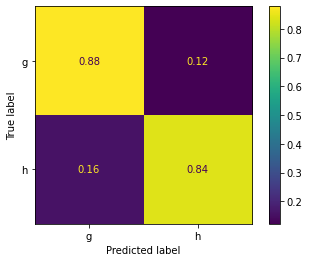

In [ ]:
print(RFC_grid_search.best_params_)

# Testing the model

#Predict the response for test dataset
y_pred = RFC_grid_search.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("classification report:")
print(metrics.classification_report(y_test, y_pred))
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
confusion_matrix = metrics.plot_confusion_matrix(RFC_grid_search, x_test, y_test, normalize='true')

####Ada Boost Classifier

In [ ]:
#Import AdaBoost Classifier model
from sklearn.ensemble import AdaBoostClassifier
#Create classifier model
ada_boost_model = AdaBoostClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': np.linspace(start = 100, stop = 1000, num = 10, dtype=int)}
# run grid search
Ada_grid_search = GridSearchCV(ada_boost_model, param_grid=param_grid)
Ada_grid_search.fit(x_res, y_res)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'n_estimators': 200}
Accuracy: 0.8177357167893445
classification report:
              precision    recall  f1-score   support

           g       0.89      0.82      0.85      1860
           h       0.71      0.82      0.76       993

    accuracy                           0.82      2853
   macro avg       0.80      0.82      0.81      2853
weighted avg       0.83      0.82      0.82      2853

Confusion matrix: [[1523  337]
 [ 183  810]]


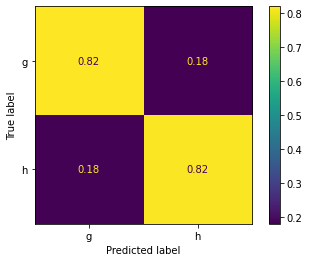

In [ ]:
print(Ada_grid_search.best_params_)

# Testing the model

#Predict the response for test dataset
y_pred = Ada_grid_search.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("classification report:")
print(metrics.classification_report(y_test, y_pred))
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
confusion_matrix = metrics.plot_confusion_matrix(Ada_grid_search, x_test, y_test, normalize='true')

####KNN Classifier

In [ ]:
#Import K Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
#Create classifier model
KNN_model= KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.linspace(start = 3, stop = 15, num = 13, dtype=int)}
# run grid search
KNN_grid_search = GridSearchCV(KNN_model, param_grid=param_grid)
KNN_grid_search.fit(x_res, y_res)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'n_neighbors': 13}
Accuracy: 0.786540483701367
classification report:
              precision    recall  f1-score   support

           g       0.83      0.85      0.84      1860
           h       0.71      0.66      0.68       993

    accuracy                           0.79      2853
   macro avg       0.77      0.76      0.76      2853
weighted avg       0.78      0.79      0.78      2853

Confusion matrix: [[1585  275]
 [ 334  659]]


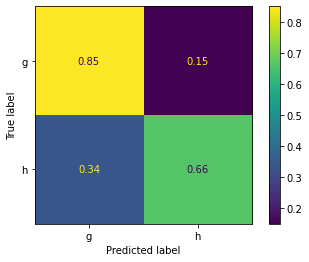

In [ ]:
print(KNN_grid_search.best_params_)
 
# Testing the model
 
#Predict the response for test dataset
y_pred = KNN_grid_search.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("classification report:")
print(metrics.classification_report(y_test, y_pred))
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
confusion_matrix = metrics.plot_confusion_matrix(KNN_grid_search, x_test, y_test, normalize='true')

####Naive Bayes Classifier

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create classifier model
naive_bayes_model = GaussianNB()
#Train the model using the training sets
naive_bayes_trained = naive_bayes_model.fit(x_res, y_res)

Accuracy: 0.729758149316509
classification report:
              precision    recall  f1-score   support

           g       0.74      0.90      0.81      1860
           h       0.68      0.42      0.52       993

    accuracy                           0.73      2853
   macro avg       0.71      0.66      0.67      2853
weighted avg       0.72      0.73      0.71      2853

Confusion matrix: [[1666  194]
 [ 577  416]]


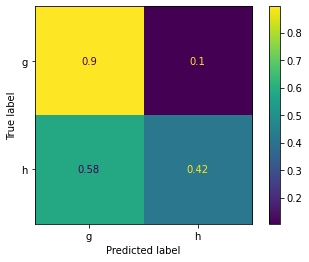

In [ ]:
# Testing the model

#Predict the response for test dataset
y_pred = naive_bayes_trained.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("classification report:")
print(metrics.classification_report(y_test, y_pred))
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
confusion_matrix = metrics.plot_confusion_matrix(naive_bayes_trained, x_test, y_test, normalize='true')